In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station

Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [13]:
# Perform a query to retrieve the date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year_ago).all()
# SELECT date, prcp FROM Measurement WHERE date > one_year_ago 

In [19]:
df = pd.DataFrame(data=results, columns=['Date', "Prcp"])
df2 = pd.DataFrame(data=results, columns=['Date', "Prcp"]).set_index('Date').rename_axis(None)

In [33]:
df = df.sort_values(by='Date')
df2 = df2.sort_index()

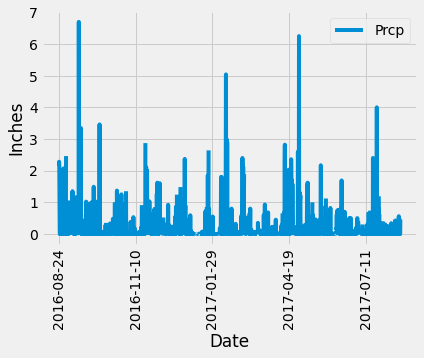

In [85]:
df.plot(x="Date", y='Prcp', rot=90)
plt.ylabel('Inches')
plt.show()
# df2.plot(y='Prcp',use_index=True, rot=90)
# plt.show()

In [36]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# plt.tight_layout()

In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
# num_stations = session.query(Station).count()
# num_stations

9

In [42]:
session.query(func.count(Station.station)).all()

[(9,)]

In [73]:

# # Query Station
# var1 = session.query(func.count(Measurement.tobs), Measurement.station).group_by(Measurement.station)
# # Add count of station (group_by)
# var2 = var1.order_by(func.count(Measurement.tobs).desc()) 
# # group_by station

# # order_by count decs 
# for v in var2:
#     print(v)

In [59]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active = session.query(func.count(Measurement.tobs), Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

for m in most_active:
    print(m)


(2772, 'USC00519281')
(2724, 'USC00519397')
(2709, 'USC00513117')
(2669, 'USC00519523')
(2612, 'USC00516128')
(2202, 'USC00514830')
(1979, 'USC00511918')
(1372, 'USC00517948')
(511, 'USC00518838')


In [62]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281')
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281')
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281')
for l in lowest_temp:
    print(l)
for h in highest_temp:
    print(h)
for a in average_temp:
    print(a)

(54.0,)
(85.0,)
(71.66378066378067,)


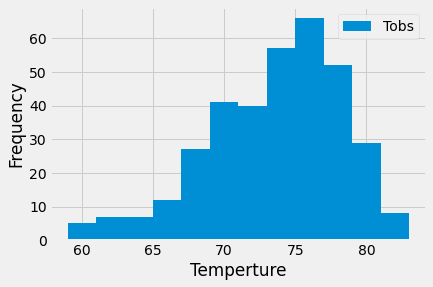

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date > one_year_ago).all()

hist_df = pd.DataFrame(data=hist, columns=['Tobs'])

hist_df.plot.hist(bins=12)
plt.xlabel('Temperture')
plt.show()


# Close session

In [ ]:
# Close Session
session.close()